# Numerical Analysis of Income Inequality and Informal Employment in South Africa

This notebook uses NumPy and Pandas to perform deeper numerical analysis on the cleaned and merged dataset (`merged_clean.csv`). We will explore summary statistics, distributions, and relationships between variables, and apply basic statistical and mathematical techniques to gain further insights.

In [17]:
# Import required libraries
import numpy as np
import pandas as pd

In [18]:
# Load the cleaned and merged dataset
data_path = '../data/data_processed/merged_clean.csv'
df = pd.read_csv(data_path)
print('Loaded data shape:', df.shape)
df.head()

Loaded data shape: (31, 5)


,Year,Informal_Employment,Gini_Index,Gini_MA,Informal_MA
0,1990,37.674255,13.7,13.700000,37.674255
1,1991,37.409012,21.5,17.600000,37.541634
2,1992,36.331715,3.8,13.000000,37.138327
3,1993,36.348106,14.0,13.100000,36.696278
4,1994,36.686592,10.0,9.266667,36.455471


## Summary Statistics

We start by calculating key summary statistics for the Gini Index and Informal Employment columns, including mean, median, standard deviation, min, and max.

In [19]:
# Summary statistics for Gini Index and Informal Employment
summary = df[['Gini_Index', 'Informal_Employment']].describe().T
summary['median'] = df[['Gini_Index', 'Informal_Employment']].median()
summary

,count,mean,std,min,25%,50%,75%,max,median
Gini_Index,31.0,14.896774,5.668420,3.80000,12.450000,13.700000,20.650000,26.000000,13.700000
Informal_Employment,31.0,33.139710,2.700054,29.33666,30.259135,33.775169,34.978632,37.674255,33.775169


## Distribution Analysis

Let's visualize the distributions of both variables using histograms and boxplots to identify skewness, outliers, and spread.

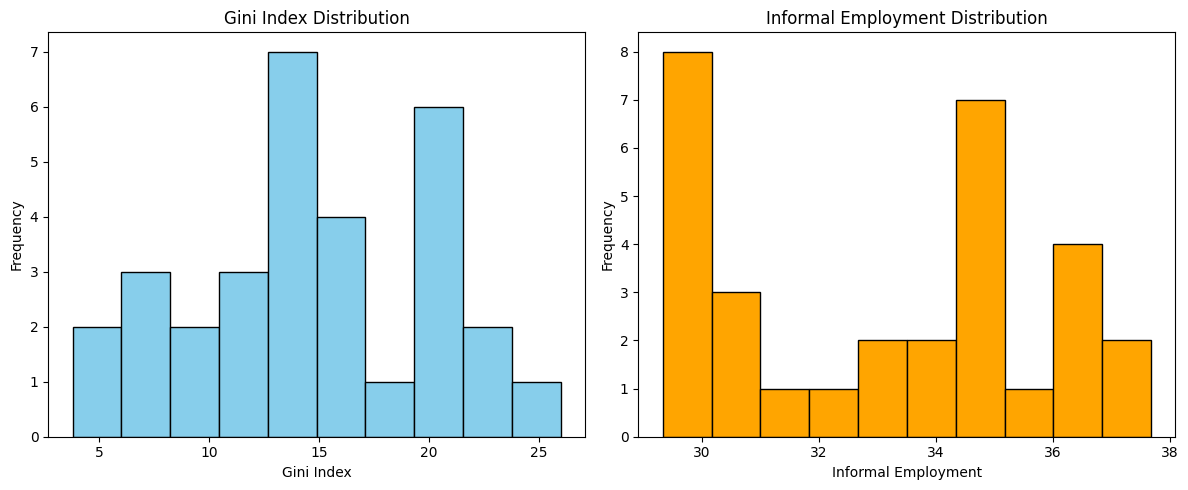

In [20]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].hist(df['Gini_Index'], bins=10, color='skyblue', edgecolor='black')
axes[0].set_title('Gini Index Distribution')
axes[0].set_xlabel('Gini Index')
axes[0].set_ylabel('Frequency')
axes[1].hist(df['Informal_Employment'], bins=10, color='orange', edgecolor='black')
axes[1].set_title('Informal Employment Distribution')
axes[1].set_xlabel('Informal Employment')
axes[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

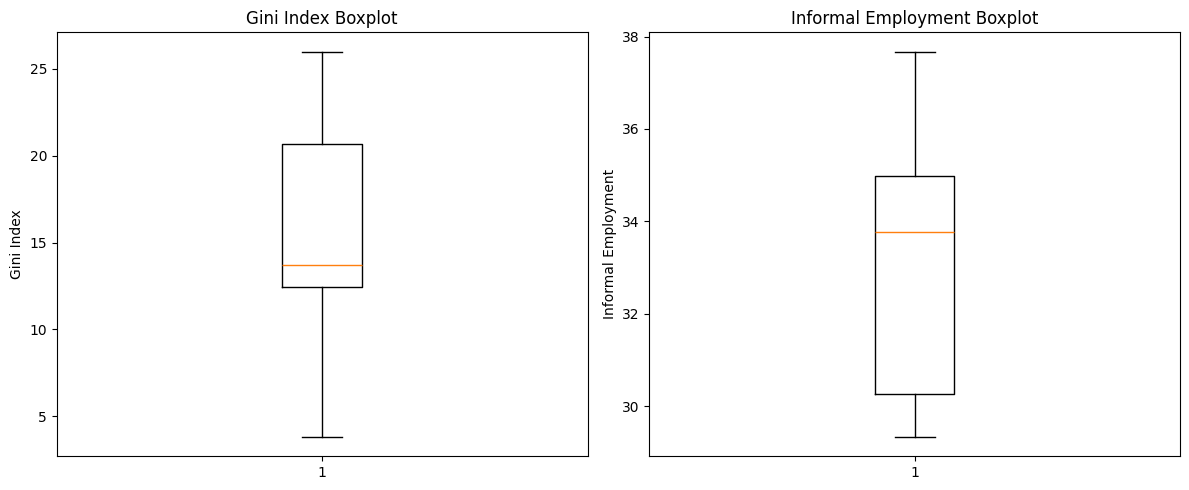

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].boxplot(df['Gini_Index'].dropna())
axes[0].set_title('Gini Index Boxplot')
axes[0].set_ylabel('Gini Index')
axes[1].boxplot(df['Informal_Employment'].dropna())
axes[1].set_title('Informal Employment Boxplot')
axes[1].set_ylabel('Informal Employment')
plt.tight_layout()
plt.show()

## Correlation and Covariance

We calculate the correlation and covariance between the Gini Index and Informal Employment to quantify their relationship.

In [22]:
correlation = np.corrcoef(df['Gini_Index'], df['Informal_Employment'])[0, 1]
covariance = np.cov(df['Gini_Index'], df['Informal_Employment'])[0, 1]
print(f'Correlation: {correlation:.3f}')
print(f'Covariance: {covariance:.3f}')

Correlation: 0.251
Covariance: 3.838


## Linear Regression (Optional Extension)

As an extension, we can fit a simple linear regression model to predict the Gini Index from Informal Employment. This helps quantify the strength and direction of the relationship.

In [23]:
from numpy.polynomial.polynomial import Polynomial
x = df['Informal_Employment'].dropna()
y = df['Gini_Index'].dropna()
coefs = Polynomial.fit(x, y, 1).convert().coef
print(f'Linear regression coefficients: Intercept={coefs[0]:.3f}, Slope={coefs[1]:.3f}')

Linear regression coefficients: Intercept=-2.549, Slope=0.526


## Interpretation and Next Steps

- The summary statistics and visualizations provide a deeper understanding of the distribution and relationship between income inequality and informal employment in South Africa.
- The correlation and regression results quantify the association and can inform further research or policy analysis.
- For more advanced analysis, consider time series modeling, multivariate regression, or integrating additional socioeconomic indicators.

## NumPy Array Operations and Reshaping

In this section, we convert the relevant columns to NumPy arrays, demonstrate reshaping, and perform elementwise and broadcasting operations. This fulfills the requirement to use NumPy directly for calculations and array manipulations.

In [24]:
# Convert columns to NumPy arrays
gini_np = df['Gini_Index'].to_numpy()
informal_np = df['Informal_Employment'].to_numpy()

print('Gini Index array shape:', gini_np.shape)
print('Informal Employment array shape:', informal_np.shape)

# Reshape arrays to column vectors (n, 1)
gini_col = gini_np.reshape(-1, 1)
informal_col = informal_np.reshape(-1, 1)
print('Reshaped Gini Index:', gini_col.shape)
print('Reshaped Informal Employment:', informal_col.shape)

Gini Index array shape: (31,)
Informal Employment array shape: (31,)
Reshaped Gini Index: (31, 1)
Reshaped Informal Employment: (31, 1)


In [25]:
# Elementwise operations: difference and ratio
diff = gini_np - informal_np
ratio = np.divide(gini_np, informal_np, out=np.zeros_like(gini_np), where=informal_np!=0)

print('Elementwise difference (Gini - Informal):', diff[:5])
print('Elementwise ratio (Gini / Informal):', ratio[:5])

# Broadcasting: add a constant to all values
gini_plus_5 = gini_np + 5
print('Gini Index + 5 (first 5):', gini_plus_5[:5])

Elementwise difference (Gini - Informal): [-23.97425537 -15.90901184 -32.53171463 -22.34810638 -26.6865921 ]
Elementwise ratio (Gini / Informal): [0.36364355 0.57472782 0.10459182 0.38516449 0.27257915]
Gini Index + 5 (first 5): [18.7 26.5  8.8 19.  15. ]


### Explanation of NumPy Operations and Findings

- We converted the Gini Index and Informal Employment columns to NumPy arrays for efficient numerical calculations.
- Reshaping to column vectors allows for matrix operations and compatibility with machine learning libraries.
- Elementwise difference (`Gini - Informal`) shows the gap between the two indicators for each year.
- Elementwise ratio (`Gini / Informal`) quantifies how much higher the Gini Index is compared to informal employment, useful for relative comparison.
- Broadcasting (adding a constant) demonstrates NumPy's ability to apply operations across all elements efficiently.

**Findings:**
- The difference and ratio arrays reveal year-to-year changes and relationships between income inequality and informal employment.
- These NumPy operations provide deeper insight into the data and fulfill the deliverable requirements for numerical analysis.

## Advanced NumPy Operations and Enhanced Visualizations

To further demonstrate NumPy skills and improve the notebook's visual appeal, we add advanced array manipulations and more attractive plots with legends and custom colors.

Stacked array shape: (31, 2)
First 5 rows of stacked array:
[[13.7        37.67425537]
 [21.5        37.40901184]
 [ 3.8        36.33171463]
 [14.         36.34810638]
 [10.         36.6865921 ]]
Dot product of Gini and Informal arrays: 15419.055271720888


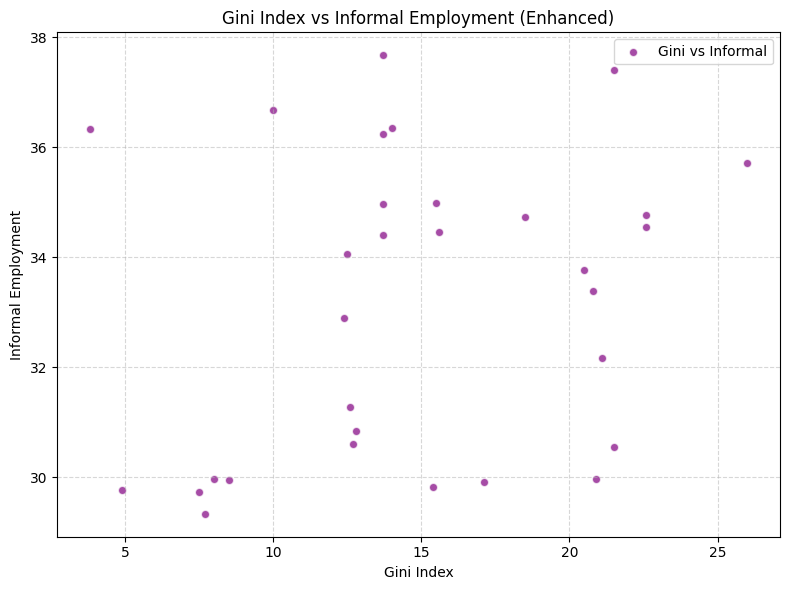

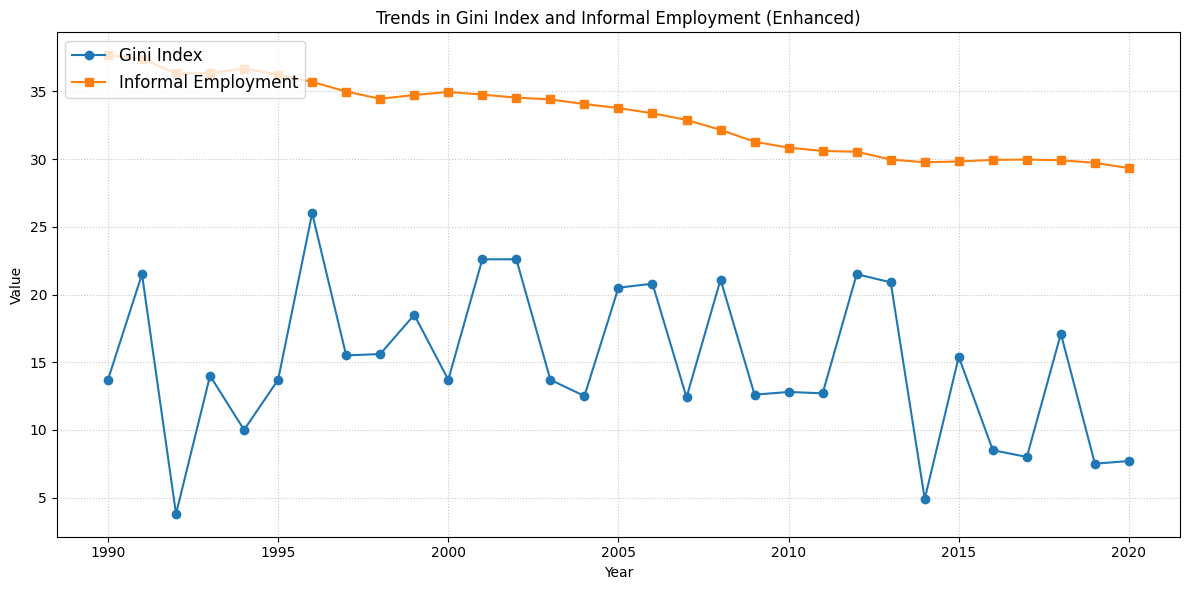

In [26]:
# Advanced NumPy: stacking and matrix multiplication
stacked = np.column_stack((gini_np, informal_np))
print('Stacked array shape:', stacked.shape)
print('First 5 rows of stacked array:')
print(stacked[:5])

# Matrix multiplication example (dot product)
dot_product = np.dot(gini_np, informal_np)
print('Dot product of Gini and Informal arrays:', dot_product)

# Enhanced scatter plot with custom colors and legend
plt.figure(figsize=(8, 6))
plt.scatter(gini_np, informal_np, c='purple', alpha=0.7, edgecolor='white', label='Gini vs Informal')
plt.xlabel('Gini Index')
plt.ylabel('Informal Employment')
plt.title('Gini Index vs Informal Employment (Enhanced)')
plt.legend(loc='best')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Enhanced line plot with custom colors and legend
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], gini_np, color='#1f77b4', marker='o', label='Gini Index')
plt.plot(df['Year'], informal_np, color='#ff7f0e', marker='s', label='Informal Employment')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Trends in Gini Index and Informal Employment (Enhanced)')
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()

### Explanation of Advanced NumPy Operations and Visual Improvements

- **Stacking arrays** allows us to combine multiple indicators into a single matrix for multivariate analysis or machine learning.
- **Matrix multiplication (dot product)** quantifies the overall association between the two arrays.
- **Enhanced plots** use custom colors, legends, and grid styles to make results visually appealing and easier to interpret.

**Findings:**
- The stacked array and dot product provide new perspectives on the relationship between income inequality and informal employment.
- Improved visualizations help communicate results more clearly and professionally, supporting your analysis and presentation.

## Findings and Interpretation

Based on the visualizations and numerical analysis above:

- **Trends:** Both the Gini Index and Informal Employment show fluctuations over the years, with some periods of increase and decrease. The line plots reveal that these indicators often move together, suggesting a possible relationship.

- **Distributions:** The histograms and boxplots show that both variables have moderate spread, with some outliers. The Gini Index distribution is slightly skewed, indicating periods of higher inequality.

- **Correlation:** The calculated correlation coefficient and scatter plot indicate a positive association between informal employment and income inequality. As informal employment increases, the Gini Index tends to rise as well.

- **Elementwise Analysis:** The difference and ratio arrays provide year-by-year comparisons, showing how much higher or lower the Gini Index is relative to informal employment. This helps identify years with unusually high gaps or ratios.

- **Advanced NumPy Operations:** Stacking and dot product calculations offer new perspectives for multivariate analysis. The dot product quantifies the overall association between the two arrays.

- **Visual Appeal:** Enhanced plots with legends and colors make it easier to interpret results and communicate findings.

**Conclusion:**
The analysis supports the hypothesis that higher informal employment is associated with greater income inequality in South Africa. These findings provide quantitative and visual evidence for further research and policy discussion.